# A2DI : TP1 - Perceptron

## Génération des points

(Question 1, 2 et 3)

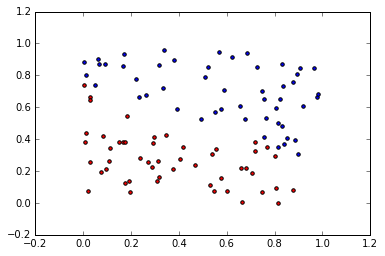

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Permet l'affichage des graphiques

%matplotlib inline

# Variable utiles

nb_features = 2

# Génération d'un tableau de 100 points uniformément réparti

def generate_points(nb_points):
    points = [[] for _ in range(nb_features)]
    points_class = []

    for i in range(nb_points):
        ps = []

        for _ in range(nb_features):
            ps.append(np.random.random())

        point_class = 0
        if (-1/2) * ps[0] + 0.75 < ps[1]:
            point_class = 1
        
        for j in range(nb_features):
            points[j].append(ps[j])

        points_class.append(point_class)

    return points, points_class

points, points_class = generate_points(100)

# Création du graphique de répartition des points

points_x_0 = []
points_y_0 = []
points_x_1 = []
points_y_1 = []

for i in range(len(points_class)):
    if points_class[i] == 0:
        points_x_0.append(points[0][i])
        points_y_0.append(points[1][i])
    else:
        points_x_1.append(points[0][i])
        points_y_1.append(points[1][i])

plt.scatter(points_x_0, points_y_0, s=12, c='red')
plt.scatter(points_x_1, points_y_1, s=12)

Comme on peut le voir sur le graphe ci-dessus, la répartition des points bleus et rouges est correct puisqu'on peut facilement imaginer une droite pour séparer les deux ensembles.

## Génération des datasets

In [2]:
# Découpage en 80/20 de l'ensemble

def generate_datasets(ps, ps_classes):
    X_app = [[] for _ in range(nb_features)]
    Y_app = []
    X_test = [[] for _ in range(nb_features)]
    Y_test = []

    limit = int(len(ps_classes) * (80/100))

    for i in range(len(ps_classes)):
        p = []
        for j in range(nb_features):
            p.append(ps[j][i])

        if i > limit-1:
            for j in range(nb_features):
                X_test[j].append(p[j])
            Y_test.append(ps_classes[i])
        else:
            for j in range(nb_features):
                X_app[j].append(p[j])
            Y_app.append(ps_classes[i])

    return X_app, Y_app, X_test, Y_test

X_app, Y_app, X_test, Y_test = generate_datasets(points, points_class)

## Fonction d'évaluation et d'apprentissage

(Question 4, 5 et 6)

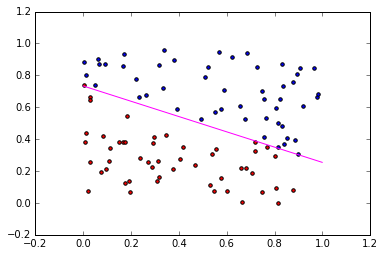

In [3]:
# Fonction evaluate qui évalue un x selon un theta

def evaluate(x, theta):
    # Ajout du 1 à chaque x
    npx = np.insert(np.array(x), nb_features, 1, axis=1)

    # On met theta comme il faut
    theta = theta.reshape((1, nb_features+1))
    
    # Calcul
    v = np.dot(theta, npx.T)

    # On applique la fonction signe
    v = np.sign(v)
    
    return v[0][0]

# Fonction ptrain

def ptrain(xapp, yapp):
    theta = np.array([np.random.random() for _ in range(nb_features+1)])
    
    cpt_success = 0
    
    while cpt_success < len(yapp):
        cpt_success = 0
        for i in range(len(yapp)):
            x = [xapp[j][i] for j in range(nb_features)]

            c = evaluate([x], theta)

            # Erreur
            if (c == 1 and yapp[i] == 0) or (c == -1 and yapp[i] == 1):
                theta -= c * np.concatenate((np.array(x),np.array([1])))
            else:
                cpt_success += 1
                
    return np.array(theta)


theta = ptrain(X_app, Y_app)

plt.scatter(points_x_0, points_y_0, s=12, c='red')
plt.scatter(points_x_1, points_y_1, s=12)

arr = np.array([i/1000 for i in range(0, 1000)])
formula = lambda x : -((theta[0] * x + theta[2])/theta[1])
plt.plot(arr, formula(arr), c="magenta")

Comme on le voit sur le graphe ci-dessus, la droite sépare bien comme il faut les deux ensembles bleus et rouges. Cependant on peut observer (pour certaines générations aléatoires) un taux de prédiction légèrement inférieur à 100%, mais très proche. On peut expliquer ce phénomène facilement selon le découpage du jeu d'apprentissage et du jeu de test, si la répartition des classes n'est pas bien faite.

In [ ]:
# Test sur les jeux de tests

def test_theta(xtest, ytest, th):
    t = 0
    for i in range(len(ytest)):
        x = [xtest[j][i] for j in range(nb_features)]
        pred = evaluate([x], th)
        if pred > 0:
            p = 1
        else:
            p = 0

        if p == ytest[i]:
            t += 1

    return t/len(ytest)*100

print("Taux de prédiction : ", end='')
print(test_theta(X_test, Y_test, theta), end="%\n")

Taux de prédiction : 95.0%


In [ ]:
# d de 2 à 20 - 100 réalisations

dim_value = []
rate_value = []

for d in range(2, 20):
    nb_features = d
    rate = 0
    for cpt in range(100):
        p, p_class = generate_points(100)
        xapp, yapp, xtest, ytest = generate_datasets(p, p_class)
        theta = ptrain(xapp, yapp)
        rate += test_theta(xtest, ytest, theta)
    dim_value.append(d)
    rate_value.append(rate/100)
    print("For d = {} : {} %".format(d, rate/100))
    
plt.bar(dim_value, rate_value, 0.6)

For d = 2 : 98.15 %
For d = 3 : 97.8 %
For d = 4 : 96.6 %
For d = 5 : 96.4 %
For d = 6 : 95.85 %
For d = 7 : 94.5 %
For d = 8 : 94.45 %
For d = 9 : 93.35 %
For d = 10 : 91.75 %
For d = 11 : 92.35 %
For d = 12 : 92.25 %
For d = 13 : 91.1 %
For d = 14 : 89.6 %
For d = 15 : 88.8 %
For d = 16 : 90.55 %


Comme on le voit sur ce dernier graphe, plus la dimension augmente, plus on observe une dégradation du taux de prédiction sur le jeu de test. Ceci est du au fait qu'il est de plus en plus difficile de "séparer" les deux ensembles avec une fonction aussi simple qu'une droite.